Before we attempt to model sales of carbon credits, it is useful to view the univariate and joint distributions of the data made available to us to see if any insights can be made.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

After we import the data, we should drop all records in which no credits have yet been issued. As we cannot assess their attractiveness to customers.

In [2]:
data=pd.read_csv(("../data/transformed/transform.csv"))
data.drop(data[data['VER_issued_credits']==0].index,inplace=True)
data

,id,created_at,updated_at,name,description,gsf_standards_version,estimated_annual_credits,crediting_period_start_date,crediting_period_end_date,methodology,...,Goal_2,Goal_11,Goal_9,Goal_10,Goal_16,Goal_14,crediting_days,VER_sold_percentage,VER_sold_percentage_per_day,continent_code
7,3653,2022-07-25 14:23:52+00:00,2023-03-15 01:54:01+00:00,GS10789 VPA10: Efficient and Clean Cooking for...,This VPA deploys highly efficient improved cha...,Gold Standard for the Global Goals,311327,2021-03-30,2026-03-30,GS TPDDTEC v3.1,...,0,0,0,0,0,0,1826,0.000000,0.000000,AF
8,3649,2022-07-20 14:54:25+00:00,2023-03-27 18:37:46+00:00,TASC Clean Cooking PoA – VPA 3 (Zambia),The goal of the proposed project is to distrib...,Gold Standard for the Global Goals,96484,2021-09-21,2026-09-20,GS TPDDTEC v3.1,...,0,0,0,0,0,0,1825,0.000000,0.000000,AF
22,3566,2022-06-06 09:32:07+00:00,2023-04-06 11:52:59+00:00,GS11450 - MicroEnergy Credits – Microfinance f...,The small-scale project activity involves mark...,Gold Standard for the Global Goals,0,2019-01-25,2024-01-24,AMS-I.A. Electricity generation by the user,...,0,0,0,0,0,0,1825,0.000000,0.000000,AS
23,3563,2022-06-06 09:31:44+00:00,2023-04-06 11:26:28+00:00,GS11450 - MicroEnergy Credits – Microfinance f...,The small-scale project activity involves mark...,Gold Standard for the Global Goals,0,2018-08-25,2023-08-24,AMS-I.A. Electricity generation by the user,...,0,0,0,0,0,0,1825,0.000000,0.000000,AS
24,3562,2022-06-06 09:31:36+00:00,2023-03-31 07:20:09+00:00,GS11450 - MicroEnergy Credits – Microfinance f...,The small-scale project activity involves mark...,Gold Standard for the Global Goals,0,2018-08-25,2023-08-24,AMS-I.A. Electricity generation by the user,...,0,0,0,0,0,0,1825,0.000000,0.000000,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,9,2019-03-27 13:49:29+00:00,2023-01-27 14:29:55+00:00,Kocaeli Landfill Gas to Electricity Project,The aim of the project includes the collection...,V2.1 SOP,100000,2012-03-01,2019-02-28,ACM0001 Flaring or use of landfill gas,...,0,0,0,0,0,0,2555,88.721233,3.472455,AS
1421,7,2019-03-27 13:49:28+00:00,2022-03-02 02:18:30+00:00,YGF Mangshi Household Biogas Tank Project,The project which supported by Hongkong The Co...,V2.1 SOP,4000,2012-10-13,2022-10-12,GS TPDDTEC v 1.,...,0,0,0,0,0,0,3651,88.278155,2.417917,AS
1422,5,2019-03-27 13:49:27+00:00,2020-05-07 18:27:16+00:00,Highveld Air Quality - Highveld Central Project,Implementation of an alternative ignition meth...,2.2,8000,2012-08-08,2022-04-30,GS Alternative Ignition Coal Fires v1.,...,0,0,0,0,0,0,3552,98.967308,2.786242,AF
1423,3,2019-03-27 13:49:27+00:00,2023-02-10 08:43:10+00:00,Degirmen Weir and Hydroelectric Power Plant,Construction and operation of Deðirmen Weir an...,V2.1 SOP,14931,2015-05-23,2022-05-22,AMS-I.D. Grid connected renewable electricity ...,...,0,0,1,0,0,0,2556,100.000000,3.912363,AS


In [3]:
import matplotlib.pyplot as plt

<Figure size 800x400 with 0 Axes>

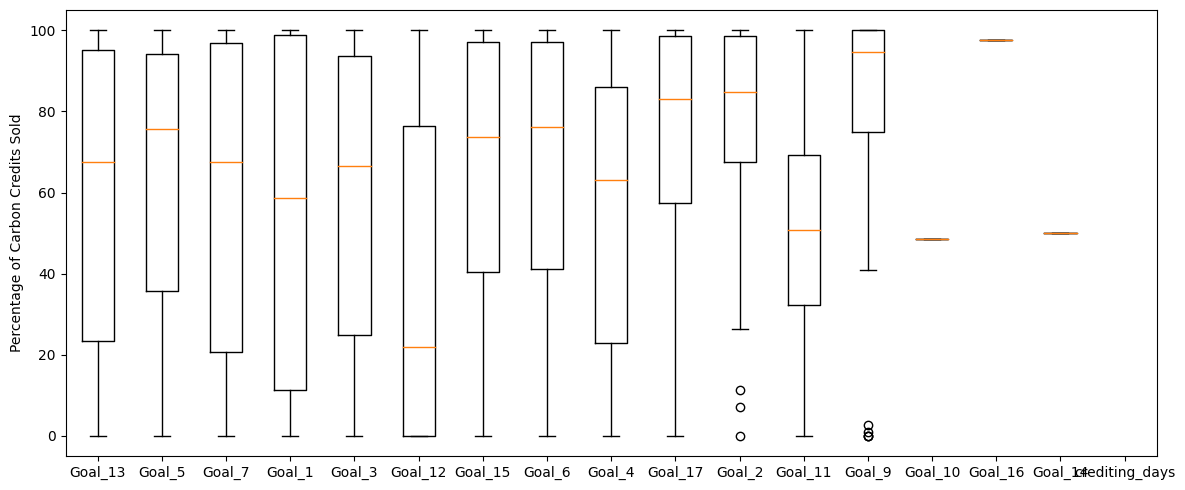

In [4]:
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(12,5),layout='tight')
goals_sales={}
for i in range(0,17):
    colname=data.columns[27+i]
    goals_sales[colname]=list(data[data.iloc[:,27+i]==1]['VER_sold_percentage'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.ylabel('Percentage of Carbon Credits Sold')
plt.tight_layout()

From plotting the percentage of credits sold across each UN sustainability goal we can notice a couple things. Firstly, there are very few carbon credits that fulfill goals 10, 14 & 16. But secondly, more importantly, there is a destinctive variation between each goals and the percentage of credits sold.
It seems like goals 2, 5, 6, 9, 15 & 17 seem noticeably more popular in terms of sales.

In [5]:
data['num_of_goals']=np.sum(data.iloc[:,27:44],axis=1)

C:\Users\balen\AppData\Local\Temp\ipykernel_26296\534723196.py:2: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=data,x='num_of_goals',y='VER_sold_percentage',color='r', shade=True,cmap="Reds", shade_lowest=False)
C:\Users\balen\AppData\Local\Temp\ipykernel_26296\534723196.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='num_of_goals',y='VER_sold_percentage',color='r', shade=True,cmap="Reds", shade_lowest=False)


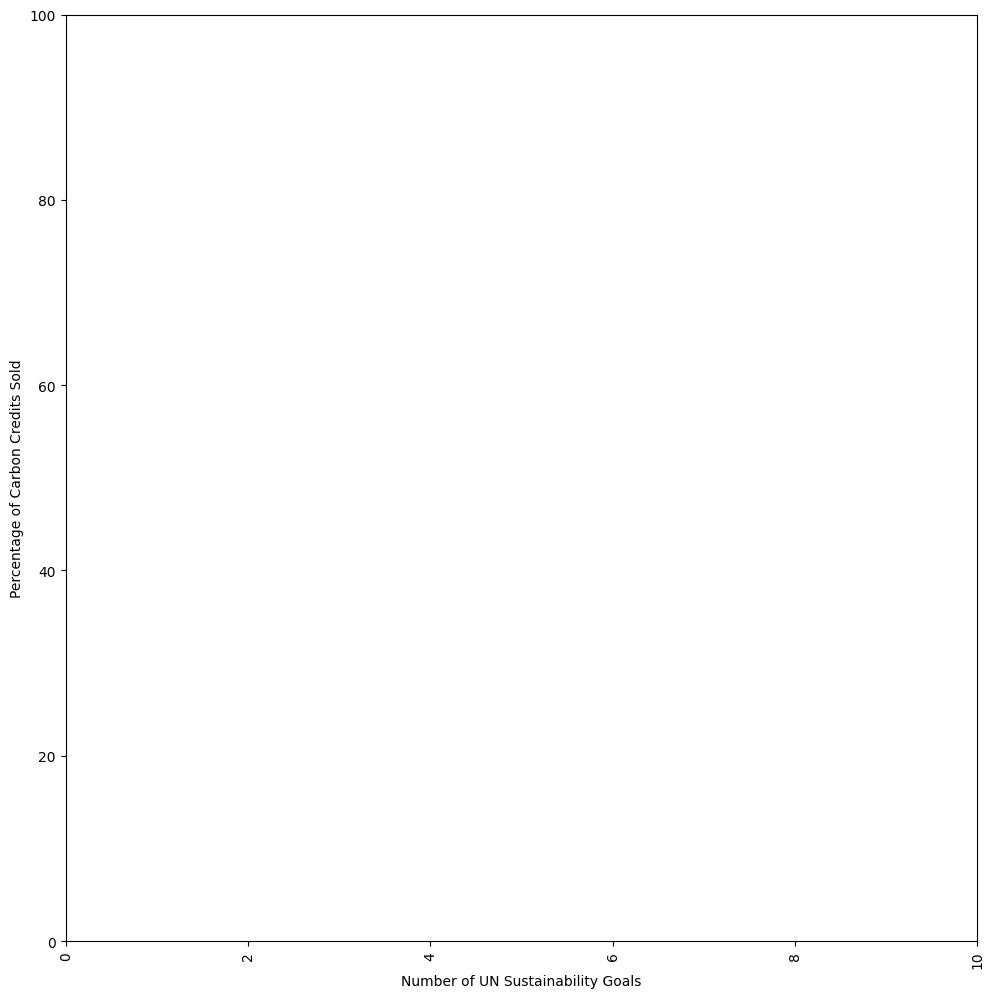

In [6]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=data,x='num_of_goals',y='VER_sold_percentage',color='r', shade=True,cmap="Reds", shade_lowest=False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.xlim([0,10])
plt.xlabel('Number of UN Sustainability Goals')
plt.ylabel('Percentage of Carbon Credits Sold')
plt.show()

After calculating the number of sustainability goals fulfilled by each carbon credit project, we can plot the joint distribution to see if there is any effect. Since the contours are orthogonal to each other, we can somewhat surprisingly conclude that the number of sustainability goals likely has little effect on the attractiveness of a carbon credit.

C:\Users\balen\AppData\Local\Temp\ipykernel_26296\3696058046.py:2: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=data,x='crediting_days',y='VER_sold_percentage',color='r', shade=True,cmap="Reds", shade_lowest=False)
C:\Users\balen\AppData\Local\Temp\ipykernel_26296\3696058046.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data,x='crediting_days',y='VER_sold_percentage',color='r', shade=True,cmap="Reds", shade_lowest=False)


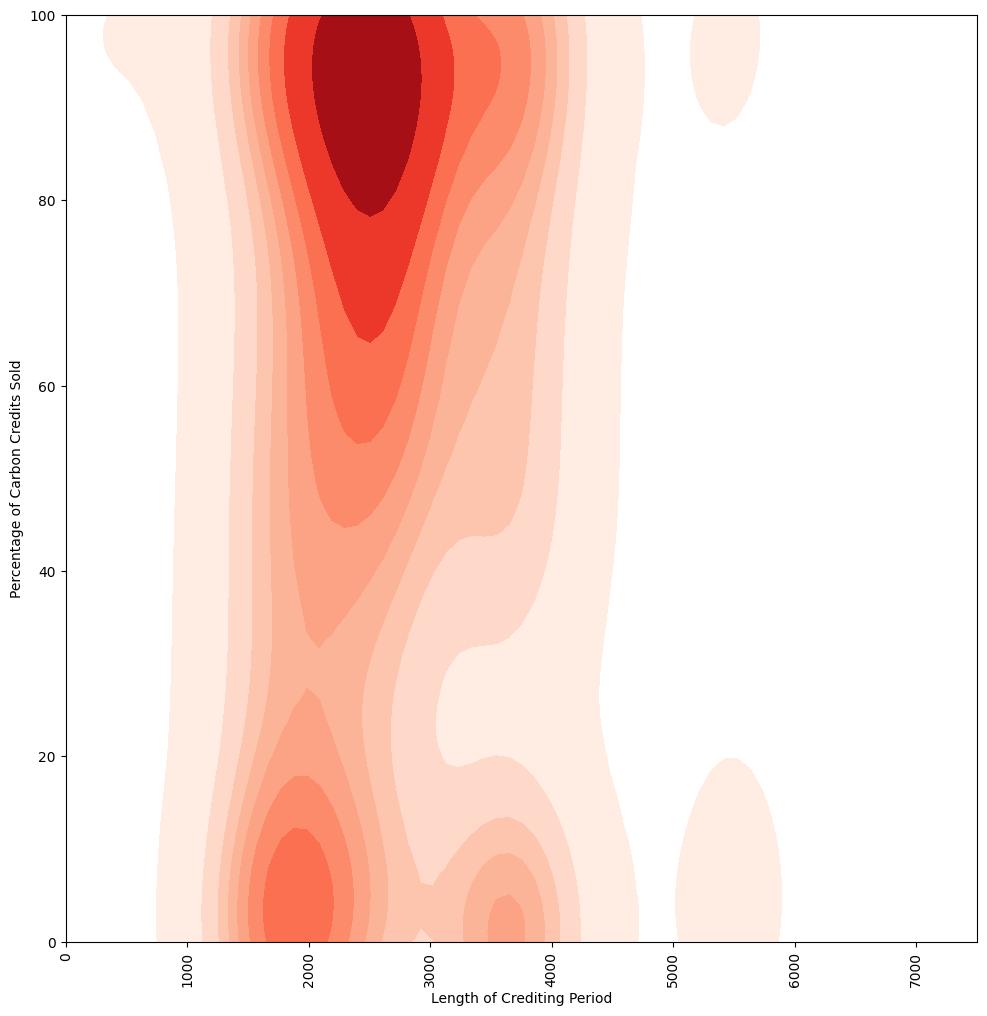

In [7]:
plt.figure(figsize=(10,10))
sns.kdeplot(data=data,x='crediting_days',y='VER_sold_percentage',color='r', shade=True,cmap="Reds", shade_lowest=False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylim([0,100])
plt.xlim([0,7500])
plt.ylabel('Percentage of Carbon Credits Sold')
plt.xlabel('Length of Crediting Period')
plt.show()

After plotting a kernel density plot between percentage of credits sold and crediting period length, we can see a similar result to the number of goals. This again suggests that the crediting preiod length has little effect on the total percentage sold. This may however be due to crediting periods being extended for carbon credits that did not sell as much. So there may still be a trend between crediting period and percentage sold, but it just doesn't appear in our data

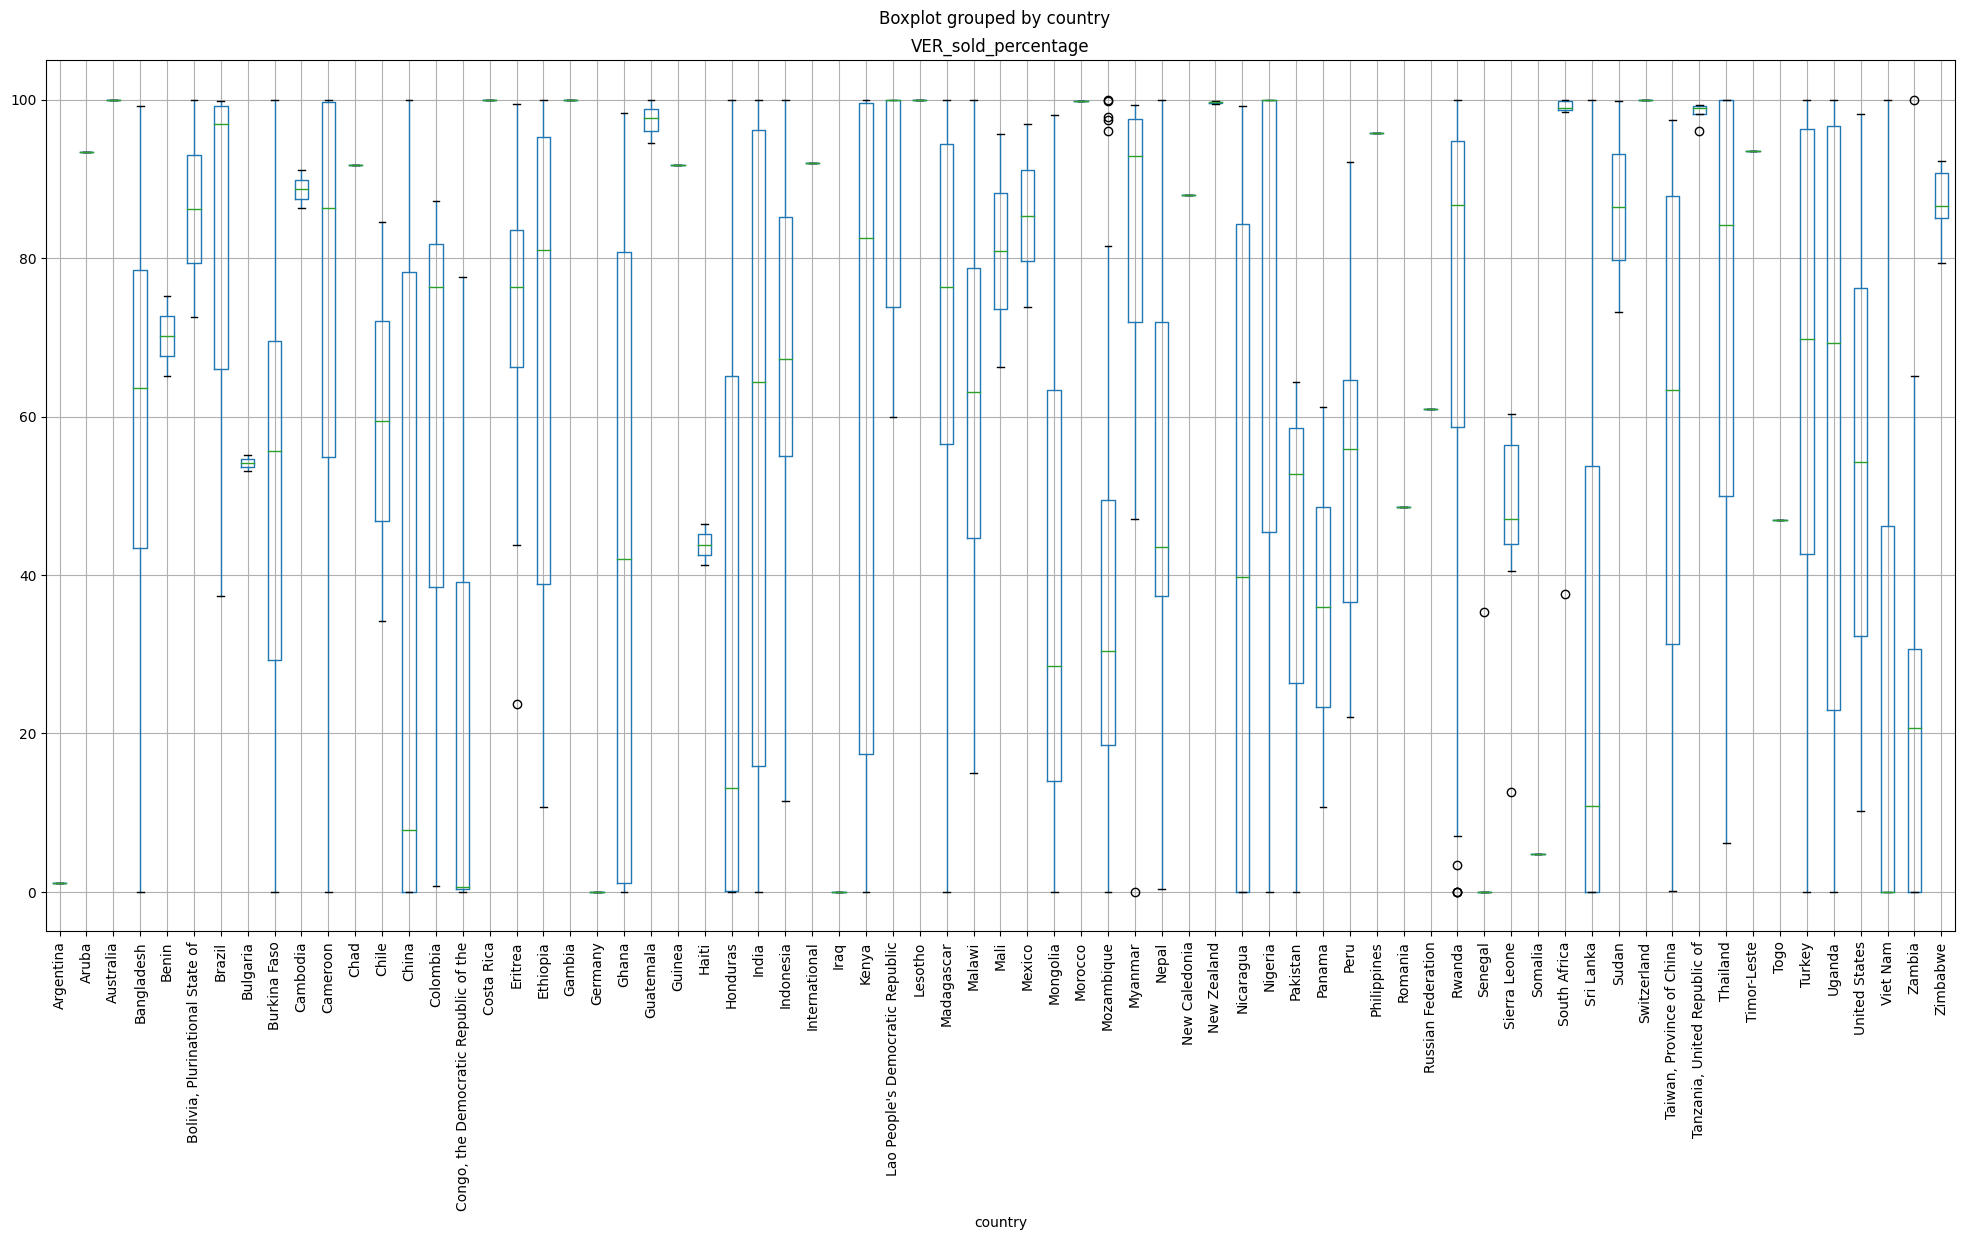

In [8]:
data.boxplot('VER_sold_percentage',by='country',figsize=(20,10))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Gold Standard carbon reduction schemes take place all over the world, with 69 different countries appearing in our data. By plotting the boxplot of each country, we can see large amounts of variation from nation to nation. However with so many countries, and limited data on quite a few it is difficult to explore the largest changes here but we will look more at the correlation of each country during model fitting. In addition, the trend between some countries may be able to be generalised on a continent basis.

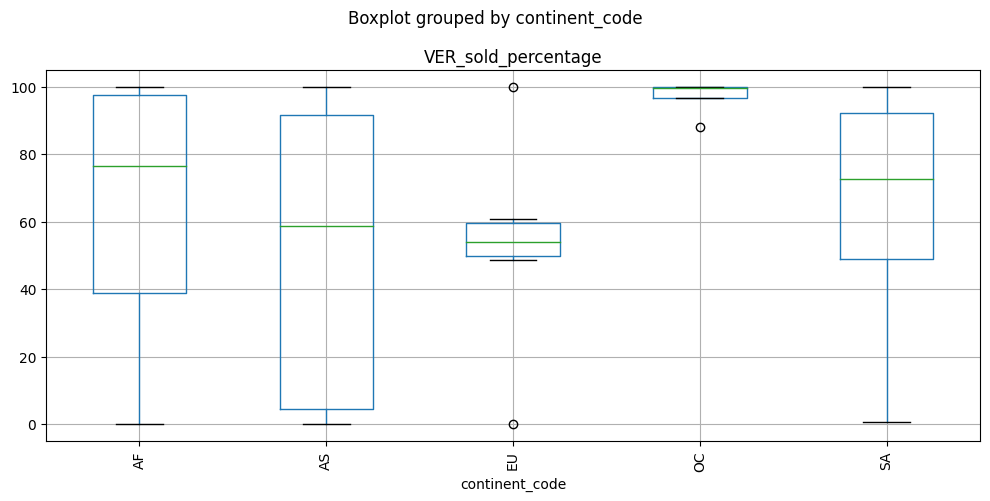

In [9]:
#projects in europe seem to have a lower change of selling than otheres
#oceania and international waters have very high number, but we do not have many projects in these regions to make concrete analysis of this
data.boxplot('VER_sold_percentage',by='continent_code',figsize=(10,5))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Plotting by continent, we notice higher sale rates for african and south american projects. This makes sense as these are generally lesser developed regions and customers would likely be more attracted to projects that benefit these areas.
Oceania does also appear to have a very high percentage sold, but since we only have 4 projects from this region in our dataset. We cannot draw any conclusions with much confidence.


In [10]:
import sklearn.preprocessing as preprocessing

CountryEncoder=preprocessing.OneHotEncoder(sparse=False)
CountryEncoder.fit(data[['country_code']])
data[CountryEncoder.get_feature_names_out()]=CountryEncoder.transform(data[['country_code']])
ContinentEncoder=preprocessing.OneHotEncoder(sparse=False)
ContinentEncoder.fit(data[['continent_code']])
data[ContinentEncoder.get_feature_names_out()]=ContinentEncoder.transform(data[['continent_code']])
SizeEncoder=preprocessing.OneHotEncoder(sparse=False)
SizeEncoder.fit(data[['size']])
data[SizeEncoder.get_feature_names_out()]=SizeEncoder.transform(data[['size']])

c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\Users\balen\AppData\Local\Temp\ipykernel_26296\1744643594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.drop(['id','estimated_annual_credits','sustaincert_id','poa_project_id','poa_project_sustaincert_id'],axis=1).corr().abs(),cmap='viridis')


<Axes: >

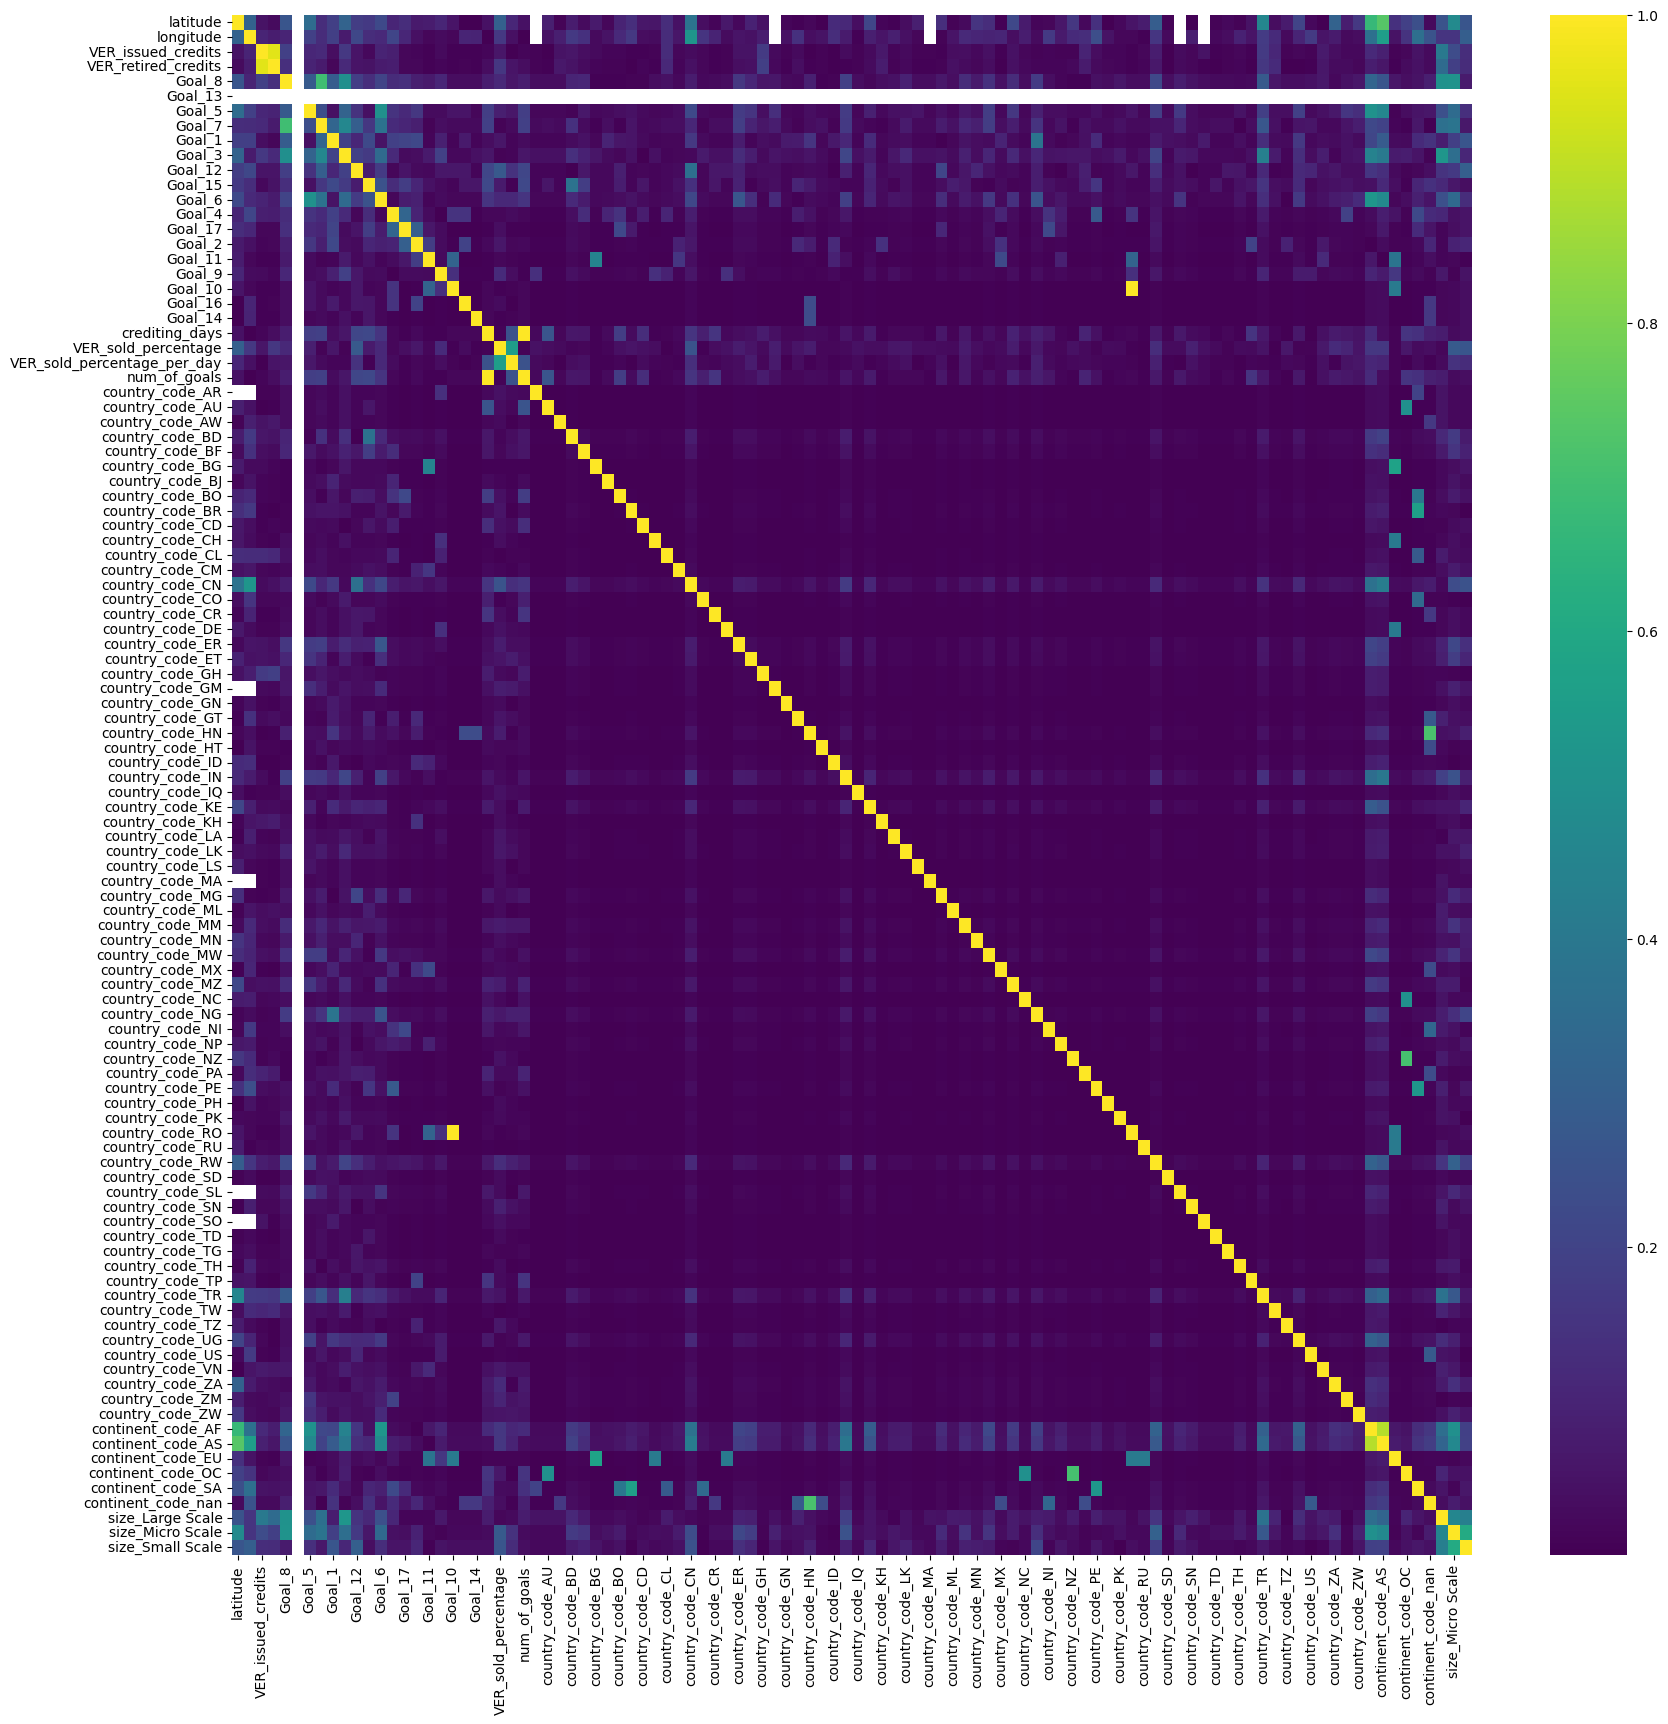

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(data.drop(['id','estimated_annual_credits','sustaincert_id','poa_project_id','poa_project_sustaincert_id'],axis=1).corr().abs(),cmap='viridis')

Finally, before fitting we want to check correlations betweens variables, as including two variables that are too largely correlated can lead to very poor model fit. Luckily, as demonstrated above, most variables are not largely correlated with one another. Those that are arise from cases of obvious correlation between country and continent.
We also notice that goal 13 is a bit unusual, this is because this is the sustainabilty goal for "climate action" which every carbon credit in our data is achieving. As such we cannot estimate the effect of changing this variable. The are a number of other missing values of correlation, which correspond to a number of countries which have no estimates of longitude and latitude. Which is likely due to some common factor in the law in these countries or commonalities in the projects done there.
These missing values and higher correlations must be addressed before fitting, but it is more useful to get an idea of what variables we will want to use before making any changes.